<a href="https://colab.research.google.com/github/prazad-25/ML_Project/blob/main/Heart_Diseases_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp

In [84]:
data = pd.read_csv('heart_disease.csv')

In [85]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [86]:
data.shape

(1025, 14)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [88]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [89]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


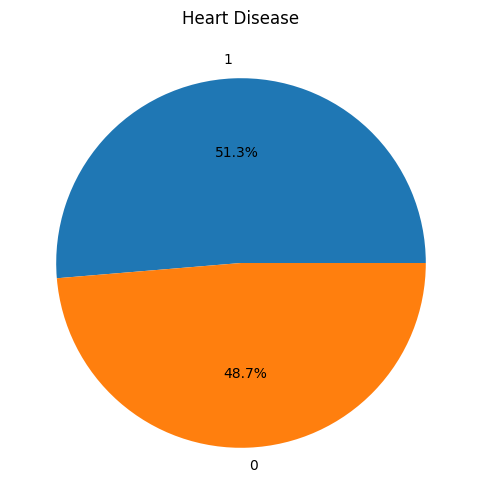

In [90]:
Heart_Disease_counts = data["target"].value_counts()
plt.figure(figsize=(12,6))
plt.pie(Heart_Disease_counts, labels=Heart_Disease_counts.index, autopct='%1.1f%%')
plt.title('Heart Disease')
plt.show()

In [91]:
data.duplicated().sum()

723

<ipython-input-92-fdf1e03955b7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature].dropna(), kde=True, bins=10)
<ipython-input-92-fdf1e03955b7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature].dropna(), kde=True, bins=10)
<ipython-input-92-fdf1e03955b7>:7: UserWarning: 

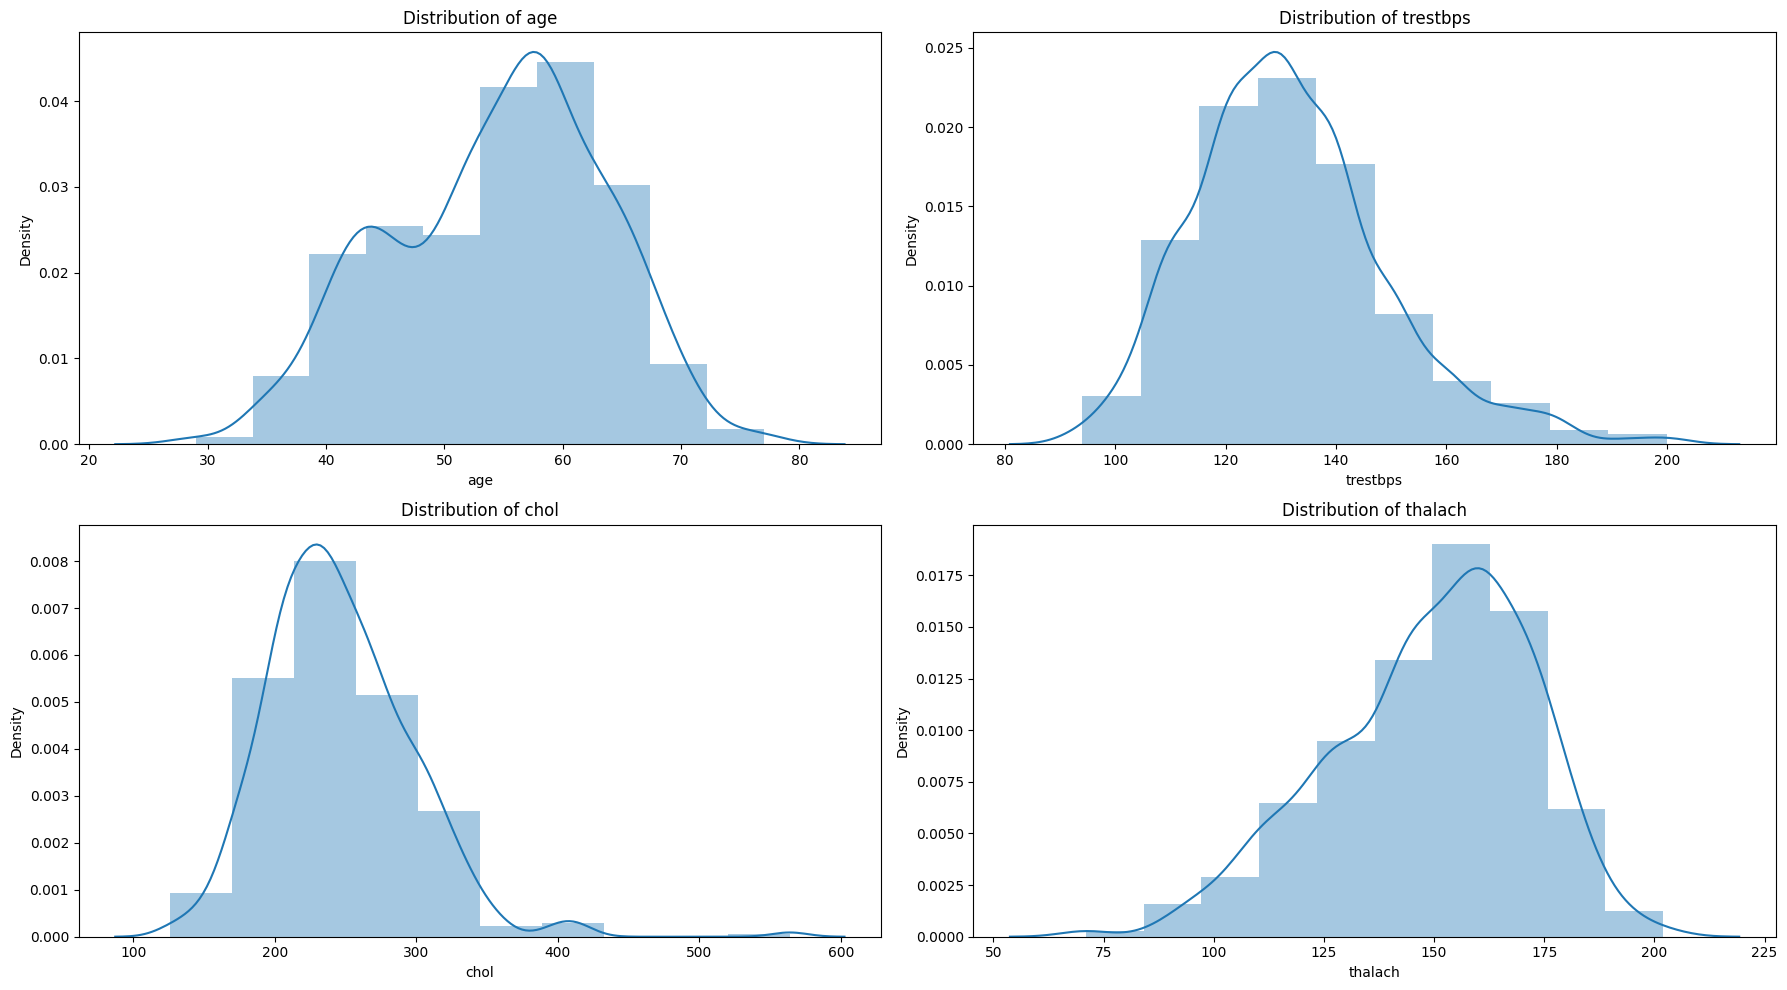

In [92]:
features = ['age', 'trestbps', 'chol', 'thalach']

plt.figure(figsize=(18, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.distplot(data[feature].dropna(), kde=True, bins=10)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

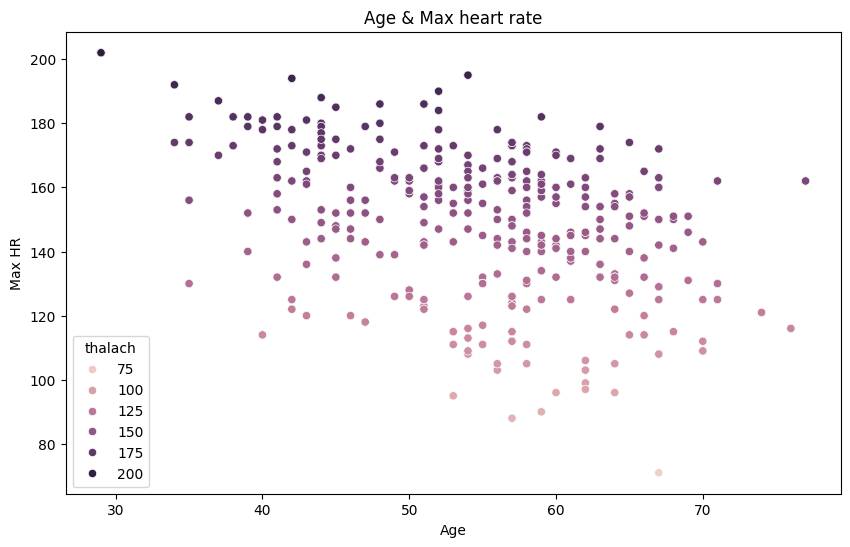

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='thalach', hue='thalach')
plt.title('Age & Max heart rate')
plt.xlabel('Age')
plt.ylabel('Max HR')
plt.show()

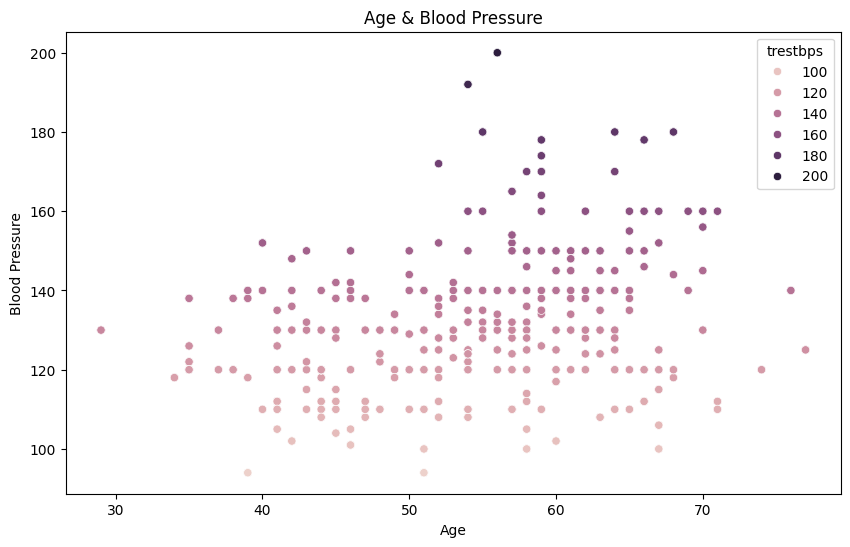

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='trestbps', hue='trestbps')
plt.title('Age & Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

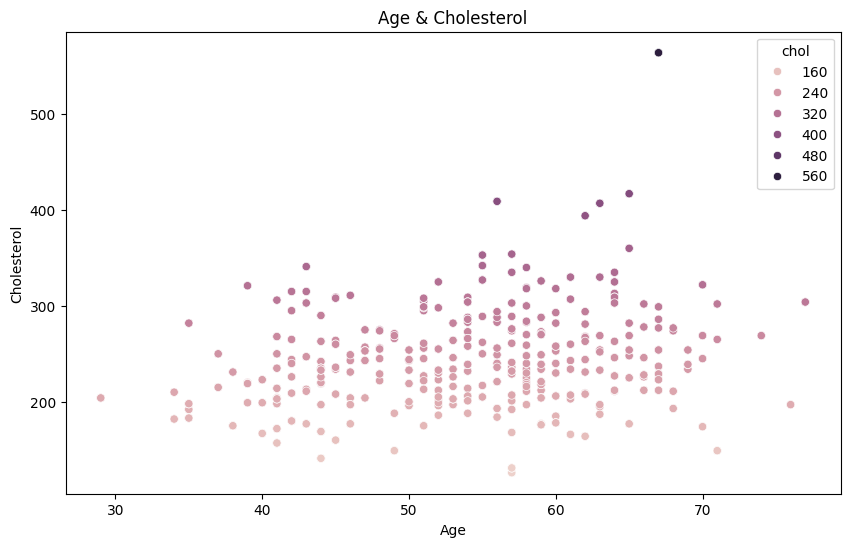

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='chol', hue='chol')
plt.title('Age & Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

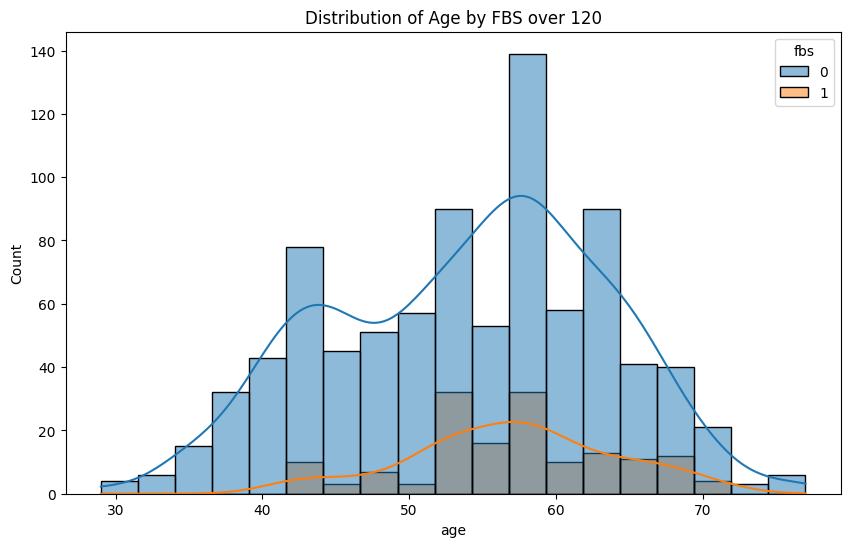

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='fbs', kde=True)
plt.title('Distribution of Age by FBS over 120')
plt.show()

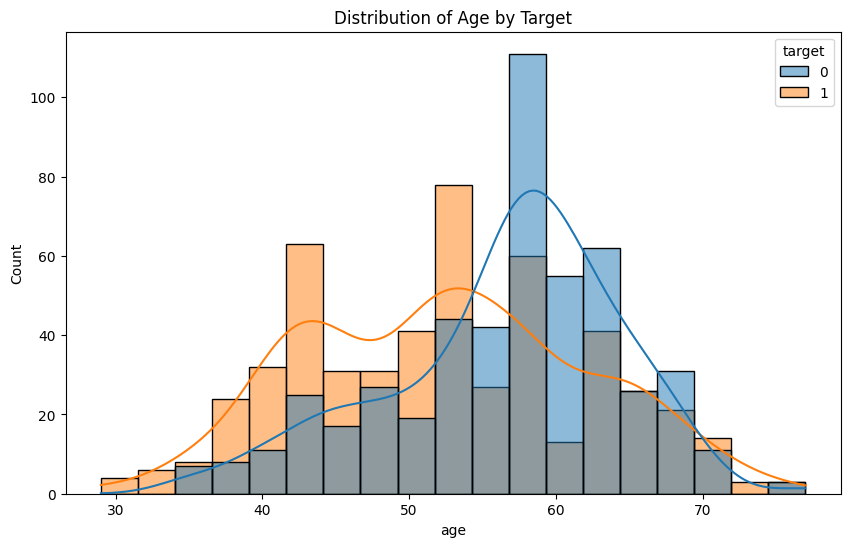

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='target', kde=True)
plt.title('Distribution of Age by Target')
plt.show()

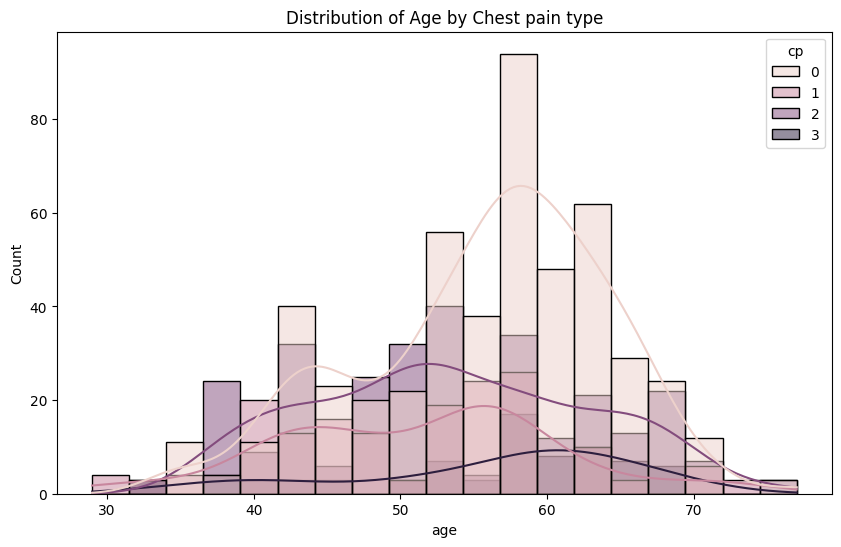

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='cp', kde=True)
plt.title('Distribution of Age by Chest pain type')
plt.show()

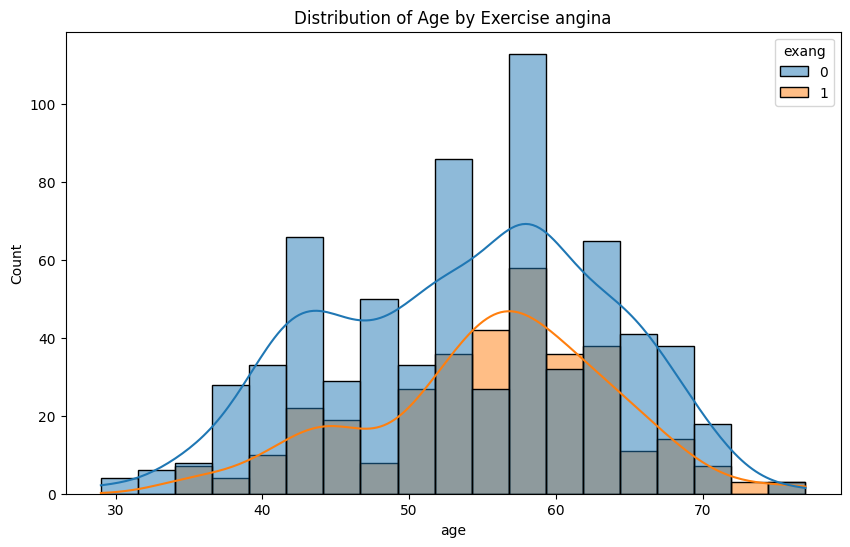

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='exang', kde=True)
plt.title('Distribution of Age by Exercise angina')
plt.show()

In [100]:
correlation_matrix=data.corr()

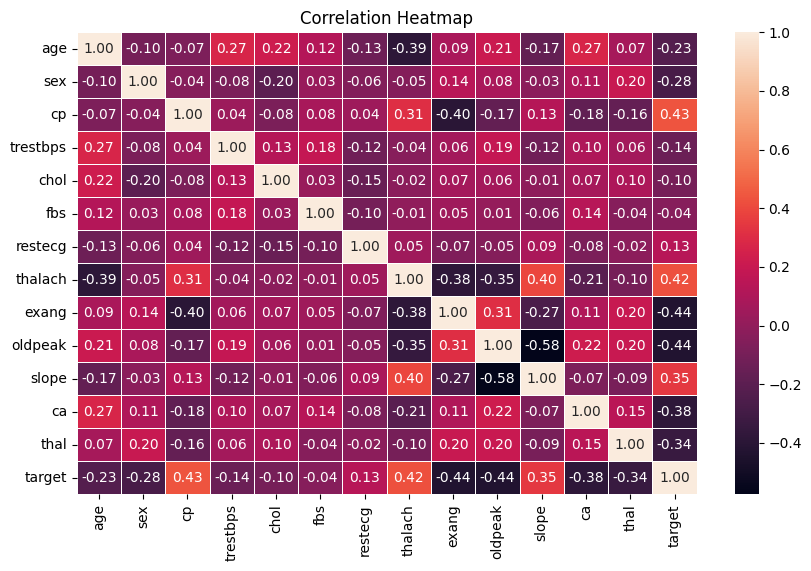

In [101]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [102]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

ds= data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [103]:
ds_clean = data.drop_duplicates()
print(ds_clean.shape)

(302, 14)


In [104]:
ds_clean['target'].value_counts()

,count
target,
1,164
0,138


In [105]:
confirm = ds_clean[ds_clean.target == 1]
notconf = ds_clean[ds_clean.target == 0]

In [106]:
print(confirm.shape)
print(notconf.shape)
confirm_sample = confirm.sample(n=138)

(164, 14)
(138, 14)


In [107]:
ds_clean = pd.concat([confirm_sample,notconf], axis=0)
ds_clean['target'].value_counts()

,count
target,
1,138
0,138


In [108]:
from sklearn.preprocessing import StandardScaler
X = ds_clean.drop(columns=['target'])
y = ds_clean['target']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
print(X_train)
print(X_test)

[[ 1.39623812  0.65578336 -0.89707554 ... -0.63826042  1.22540509
   1.08785747]
 [ 0.39414176  0.65578336  1.06794707 ...  0.99284954  1.22540509
   1.08785747]
 [-0.49661055 -1.52489383 -0.89707554 ...  0.99284954 -0.75244172
  -0.57097492]
 ...
 [-0.27392247  0.65578336  2.05045838 ... -0.63826042 -0.75244172
   1.08785747]
 [ 0.72817388  0.65578336 -0.89707554 ... -0.63826042  0.23648168
  -0.57097492]
 [-0.0512344  -1.52489383  0.08543577 ...  0.99284954  0.23648168
  -0.57097492]]
[[ 0.28279772  0.65578336  1.06794707  1.02687946 -1.50866036 -0.44136741
   0.90496252  1.09094417 -0.70710678  0.43668375  0.99284954 -0.75244172
  -0.57097492]
 [-1.38736287  0.65578336  2.05045838  0.91529729 -0.06424666 -0.44136741
  -1.01634252  1.26531834 -0.70710678 -0.23947173  0.99284954  1.22540509
  -0.57097492]
 [ 0.61682984  0.65578336 -0.89707554  0.74792402  0.65796019 -0.44136741
  -1.01634252 -0.30404916  1.41421356  1.45091698 -0.63826042  1.22540509
   1.08785747]
 [-2.27811519  0.65

In [111]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'

In [112]:
!pip install scikit-learn

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# SVC Model with Hyperparameter Tuning
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}
grid_svc = GridSearchCV(SVC(), param_grid_svc, refit=True, cv=5)
grid_svc.fit(X_train, y_train)
model1 = grid_svc.best_estimator_
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
r1 = r2_score(y_test, y_pred1)

# XGBoost Model with Hyperparameter Tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
grid_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, refit=True, cv=5)
grid_xgb.fit(X_train, y_train)
model2 = grid_xgb.best_estimator_
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

# RandomForest Model with Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, refit=True, cv=5)
grid_rf.fit(X_train, y_train)
model3 = grid_rf.best_estimator_
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
r3 = r2_score(y_test, y_pred3)

# DecisionTree Model with Hyperparameter Tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dt, refit=True, cv=5)
grid_dt.fit(X_train, y_train)
model4 = grid_dt.best_estimator_
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
r4 = r2_score(y_test, y_pred4)

# GaussianNB Model with Cross-Validation
model5 = GaussianNB(var_smoothing=1e-09)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)
r5 = r2_score(y_test, y_pred5)

# KNeighborsClassifier Model with Hyperparameter Tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit=True, cv=5)
grid_knn.fit(X_train, y_train)
model6 = grid_knn.best_estimator_
y_pred6 = model6.predict(X_test)
accuracy6 = accuracy_score(y_test, y_pred6)
r6 = r2_score(y_test, y_pred6)

# Output the best parameters for each model
print("Best parameters for SVC:", grid_svc.best_params_)
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best parameters for RandomForest:", grid_rf.best_params_)
print("Best parameters for DecisionTree:", grid_dt.best_params_)
print("Best parameters for KNN:", grid_knn.best_params_)

# Output accuracies and R2 scores
print("SVC Accuracy:", accuracy1, "R2:", r1)
print("XGBoost Accuracy:", accuracy2, "R2:", r2)
print("RandomForest Accuracy:", accuracy3, "R2:", r3)
print("DecisionTree Accuracy:", accuracy4, "R2:", r4)
print("GaussianNB Accuracy:", accuracy5, "R2:", r5)
print("KNN Accuracy:", accuracy6, "R2:", r6)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters for SVC: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best parameters for RandomForest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best parameters for DecisionTree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1}
SVC Accuracy: 0.8928571428571429 R2: 0.5714285714285714
XGBoost Accuracy: 0.7857142857142857 R2: 0.1428571428571429
RandomForest Accuracy: 0.8214285714285714 R2: 0.2857142857142857
DecisionTree Accuracy: 0.625 R2: -0.5
GaussianNB Accuracy: 0.9107142857142857 R2: 0.6428571428571428
KNN Accuracy: 0.8392857142857143 R2: 0.3571428571428571


In [114]:
ds_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
91,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
66,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
191,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
389,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [115]:

import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2568, activation='leaky_relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2568, activation='leaky_relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='softmax'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.6795 - loss: 0.6847
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.8423 - loss: 0.6424
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.8731 - loss: 0.6152
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.8530 - loss: 0.6238
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.7636 - loss: 0.6239
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.8032 - loss: 0.6074
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 0.7983 - loss: 0.6097
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.7927 - loss: 0.6084
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.7270 - loss: 0.6133
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.7778 - loss: 0.6078
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.8259 - loss: 0.6003
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.7907 - loss: 0.6000


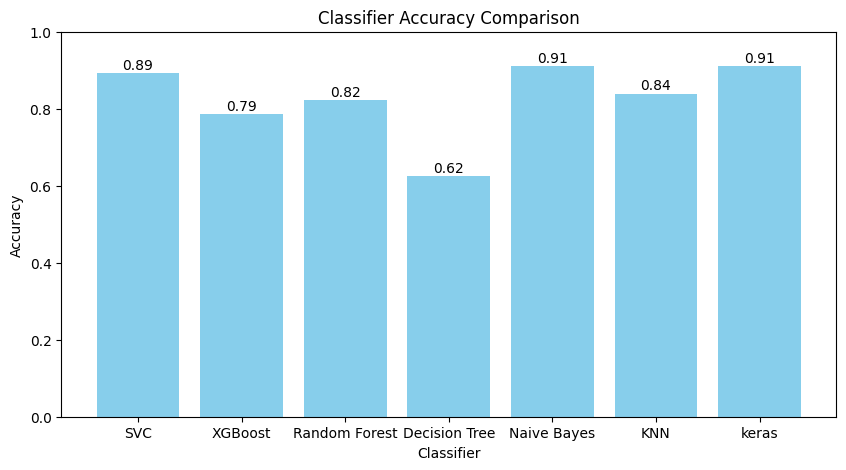

In [116]:
classifier_names = ['SVC', 'XGBoost', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'KNN',"keras"]
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6,accuracy]
r2_scores = [r1, r2, r3, r4, r5, r6]


plt.figure(figsize=(10,5))
plt.bar(classifier_names, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim([0, 1])
for i in range(len(classifier_names)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')
plt.show()

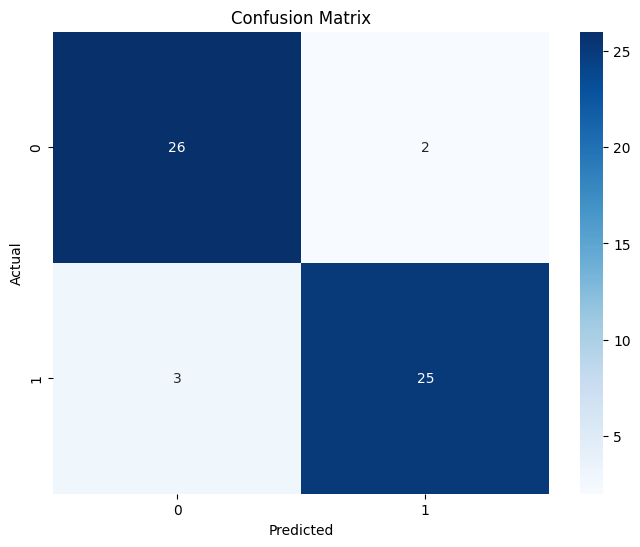

In [117]:
con_matrix = confusion_matrix(y_test, y_pred5)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

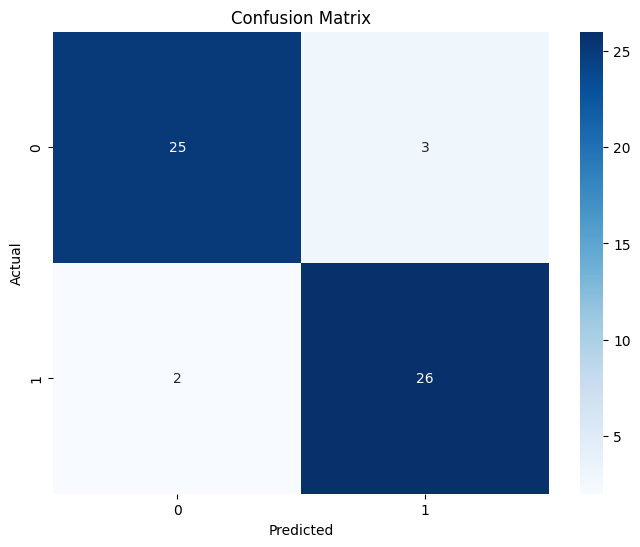

In [118]:
con_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()